In [16]:
pwd

'C:\\Users\\Shubham\\Downloads'


# Linear Regression - Project Exercise


## Imports
Import pandas, numpy, matplotlib,and seaborn. *

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

In [2]:
customers=pd.read_csv('Ecommerce customers')

In [14]:

customers.describe(include='object')

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue
freq,1,1,7


In [3]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

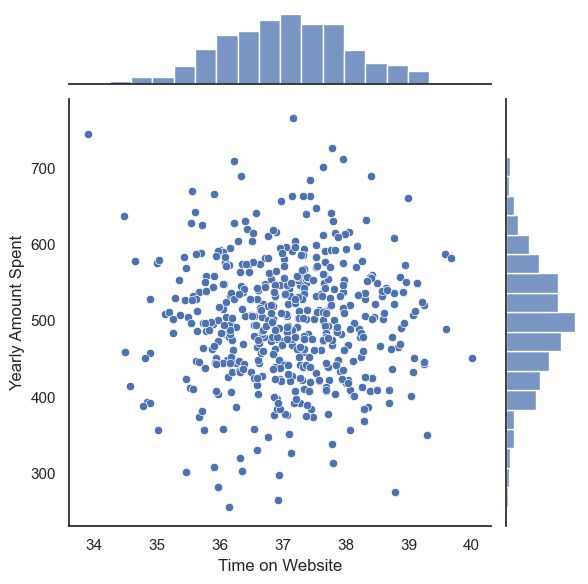

In [17]:
#sns.set(style="white", color_codes=True)
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers , kind='scatter')
plt.show()

** Do the same but with the Time on App column instead. **

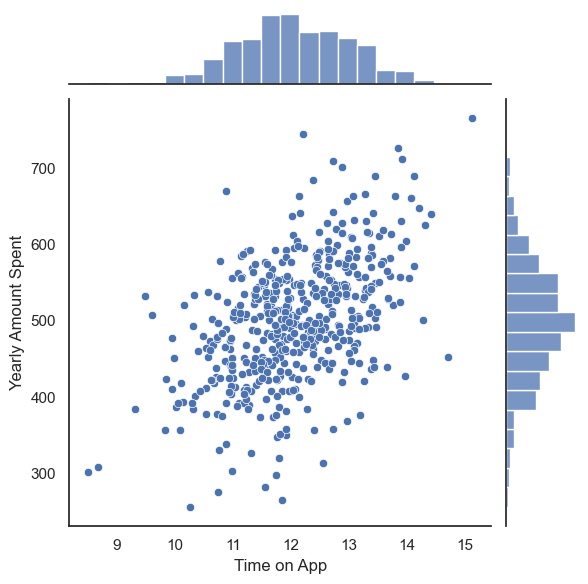

In [19]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers , kind='scatter')
plt.show()

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

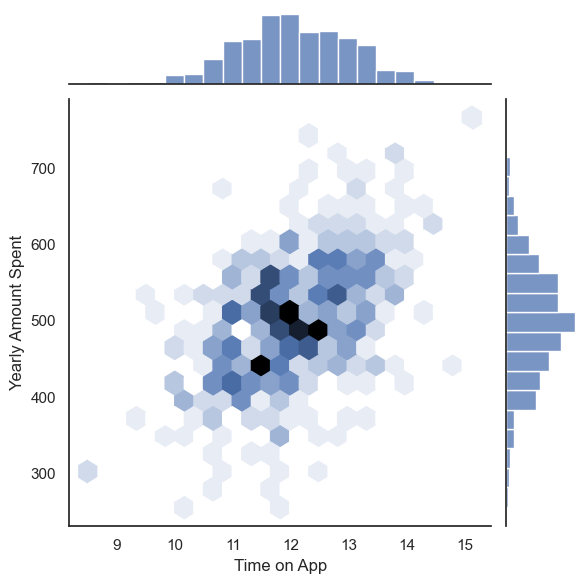

In [20]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers , kind='hex')
plt.show()

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

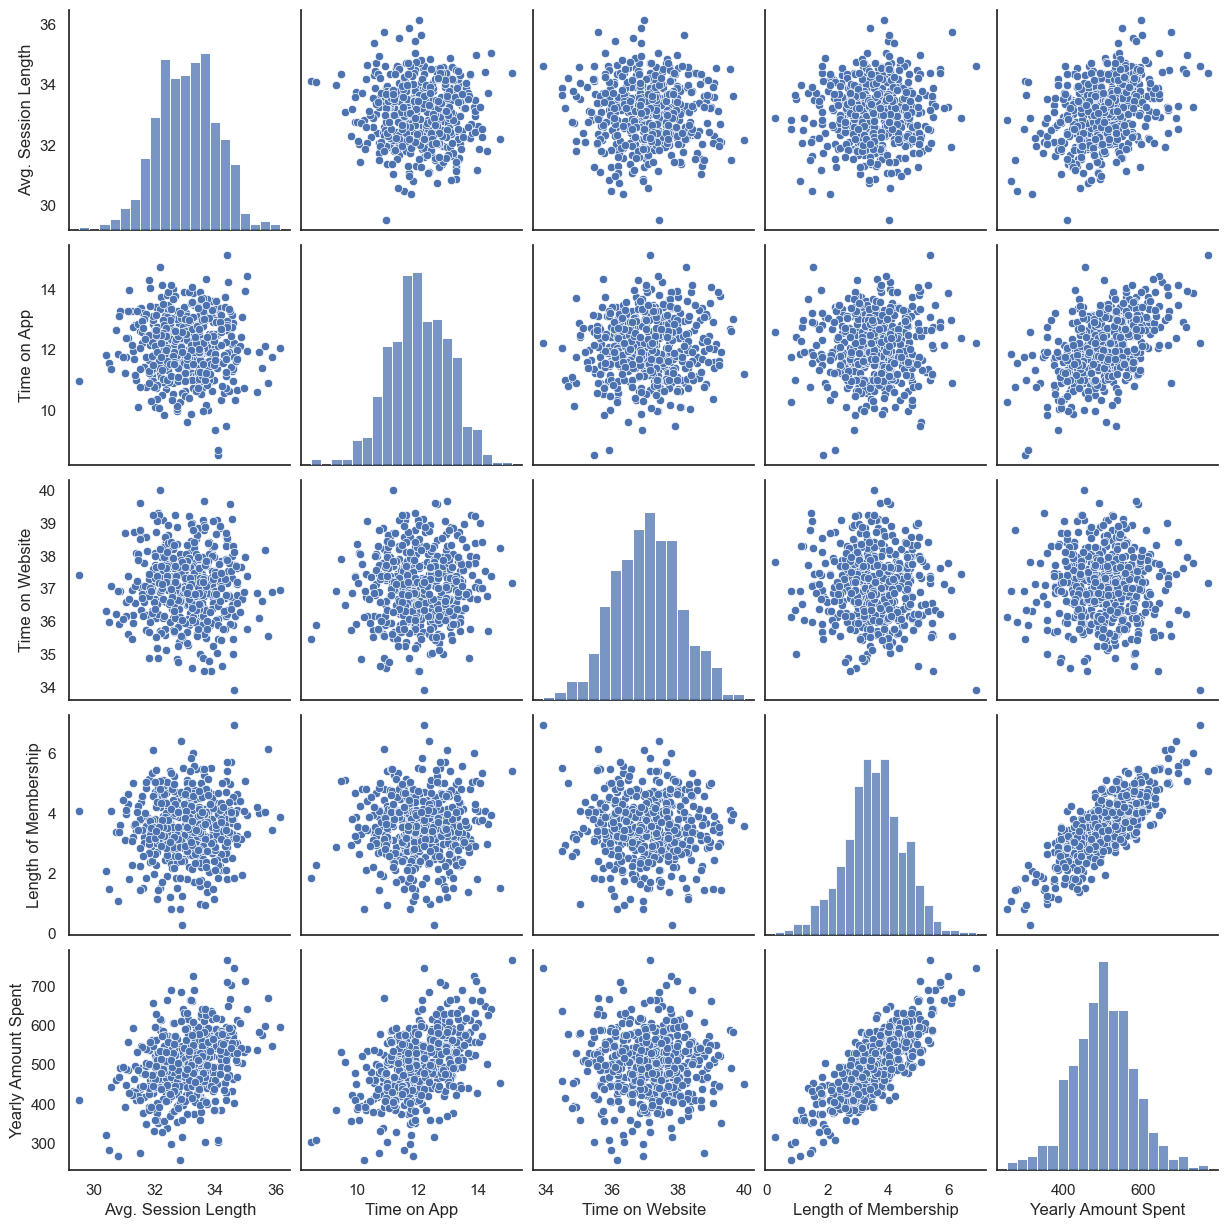

In [26]:
sns.pairplot(customers)
plt.show()

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [28]:
customers.shape

(500, 8)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

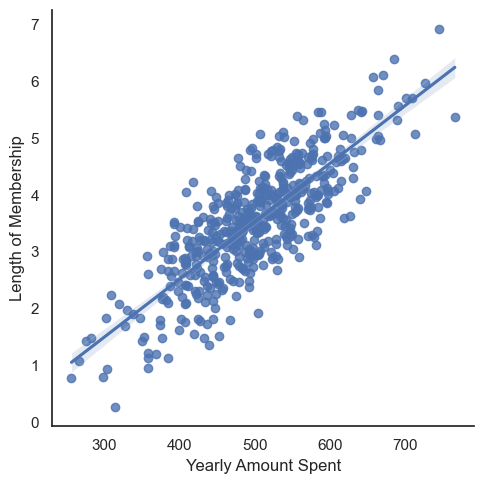

In [35]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x=customers.drop(['Yearly Amount Spent','Address','Avatar','Email'], axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [6]:
y=customers['Yearly Amount Spent']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: Yearly Amount Spent
Non-Null Count  Dtype  
--------------  -----  
500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 202 to 351
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   350 non-null    float64
 1   Time on App           350 non-null    float64
 2   Time on Website       350 non-null    float64
 3   Length of Membership  350 non-null    float64
dtypes: float64(4)
memory usage: 13.7 KB


## Training the Model

Now its time to train our model on our training data!


In [9]:
#from sklearn.linear_model import linearregression
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [10]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [11]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [12]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [13]:
prediction=lm.predict(X_test)

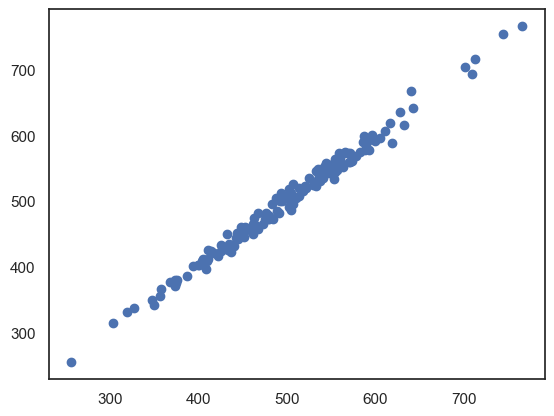

In [74]:
plt.scatter(y_test,prediction)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [79]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.2281486534308295
MSE: 79.81305165097444
RMSE: 8.933815066978633


## Residuals

C:\Users\Shubham\AppData\Local\Temp\ipykernel_14020\1219987323.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50);


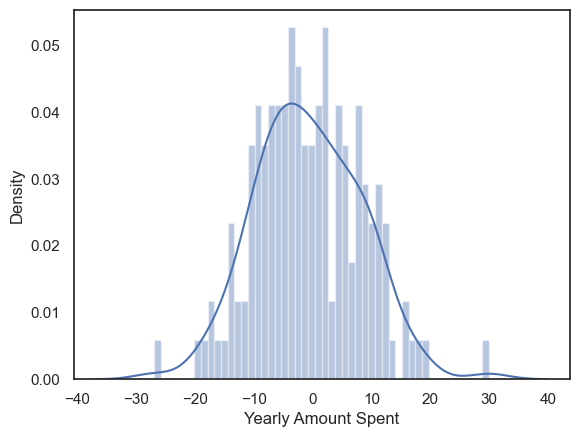

In [76]:
sns.distplot((y_test-prediction),bins=50);

## Conclusion

In [15]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
